In [2]:
%pip install matplotlib pandas seaborn scikit-learn imbalanced-learn
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from collections import Counter
from imblearn.over_sampling import SMOTE

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
# Load the datasets
file_ispu = "D:\\KULIAH\\SEMESTER 6\\PROYEK DATA MINING\\DATASET\\DATA MINING\\Data Indeks Standar Pencemar Udara (ISPU) di Provinsi DKI Jakarta.csv"
file_population = "D:\\KULIAH\\SEMESTER 6\\PROYEK DATA MINING\\DATASET\\DATA MINING\\Data Kepadatan Penduduk Provinsi DKI Jakarta.csv"



# Reload datasets with correct delimiter
df_ispu = pd.read_csv(file_ispu, delimiter=';')
df_population = pd.read_csv(file_population, delimiter=';')

# Display first few rows of both datasets in a well-formatted table
from IPython.display import display

print("📌 **Data ISPU (Indeks Standar Pencemar Udara)**")
display(df_ispu.head())

print("\n📌 **Data Kepadatan Penduduk DKI Jakarta**")
display(df_population.head())

📌 **Data ISPU (Indeks Standar Pencemar Udara)**


,periode_data,bulan,tanggal,stasiun,pm_sepuluh,pm_duakomalima,sulfur_dioksida,karbon_monoksida,ozon,nitrogen_dioksida,max,parameter_pencemar_kritis,kategori
0,202401,1,21,DKI3 Jagakarsa,51.0,65.0,45.0,9.0,8.0,79.0,79.0,NaN,SEDANG
1,202401,1,22,DKI3 Jagakarsa,27.0,34.0,45.0,5.0,8.0,56.0,56.0,NaN,SEDANG
2,202401,1,23,DKI3 Jagakarsa,NaN,52.0,46.0,6.0,9.0,51.0,52.0,PM25,SEDANG
3,202401,1,24,DKI3 Jagakarsa,46.0,65.0,46.0,8.0,9.0,38.0,65.0,PM25,SEDANG
4,202401,1,25,DKI3 Jagakarsa,37.0,55.0,47.0,7.0,11.0,28.0,55.0,PM25,SEDANG



📌 **Data Kepadatan Penduduk DKI Jakarta**


,periode_data,wilayah,kecamatan,kelurahan,jumlah_penduduk,jumlah_kepadatan
0,2024,KOTA ADM. JAKARTA PUSAT,JOHAR BARU,TANAH TINGGI,45230,71993.81
1,2024,KOTA ADM. JAKARTA UTARA,PENJARINGAN,PENJARINGAN,112592,24871.61
2,2024,KOTA ADM. JAKARTA UTARA,PENJARINGAN,KAMAL MUARA,19042,1221.74
3,2024,KOTA ADM. JAKARTA UTARA,PENJARINGAN,KAPUK MUARA,47531,5179.99
4,2024,KOTA ADM. JAKARTA UTARA,PENJARINGAN,PEJAGALAN,87481,23777.30


In [4]:
print(df_ispu.dtypes)  # Cek tipe data di dataset ISPU
print(df_population.dtypes)  # Cek tipe data di dataset Kepadatan Penduduk

periode_data                   int64
bulan                          int64
tanggal                        int64
stasiun                       object
pm_sepuluh                   float64
pm_duakomalima               float64
sulfur_dioksida              float64
karbon_monoksida             float64
ozon                         float64
nitrogen_dioksida            float64
max                          float64
parameter_pencemar_kritis     object
kategori                      object
dtype: object
periode_data          int64
wilayah              object
kecamatan            object
kelurahan            object
jumlah_penduduk       int64
jumlah_kepadatan    float64
dtype: object


In [5]:
# Cek missing values
missing_values_ispu = df_ispu.isnull().sum()
missing_values_population = df_population.isnull().sum()

# Buat DataFrame untuk tampilan lebih rapi
df_missing_ispu = pd.DataFrame({
    "Kolom": missing_values_ispu.index,
    "Jumlah Missing": missing_values_ispu.values,
    "Persentase (%)": (missing_values_ispu.values / len(df_ispu)) * 100
})

df_missing_population = pd.DataFrame({
    "Kolom": missing_values_population.index,
    "Jumlah Missing": missing_values_population.values,
    "Persentase (%)": (missing_values_population.values / len(df_population)) * 100
})

# Hanya tampilkan kolom yang memiliki missing values
df_missing_ispu = df_missing_ispu[df_missing_ispu["Jumlah Missing"] > 0]
df_missing_population = df_missing_population[df_missing_population["Jumlah Missing"] > 0]

# Menampilkan tabel
print("📌 Missing Values pada Dataset ISPU:")
print(df_missing_ispu.to_string(index=False))

print("\n📌 Missing Values pada Dataset Population:")
print(df_missing_population.to_string(index=False))

📌 Missing Values pada Dataset ISPU:
                    Kolom  Jumlah Missing  Persentase (%)
               pm_sepuluh             112        6.120219
           pm_duakomalima              20        1.092896
          sulfur_dioksida               9        0.491803
         karbon_monoksida              12        0.655738
                     ozon               9        0.491803
        nitrogen_dioksida              26        1.420765
                      max               5        0.273224
parameter_pencemar_kritis              46        2.513661

📌 Missing Values pada Dataset Population:
Empty DataFrame
Columns: [Kolom, Jumlah Missing, Persentase (%)]
Index: []


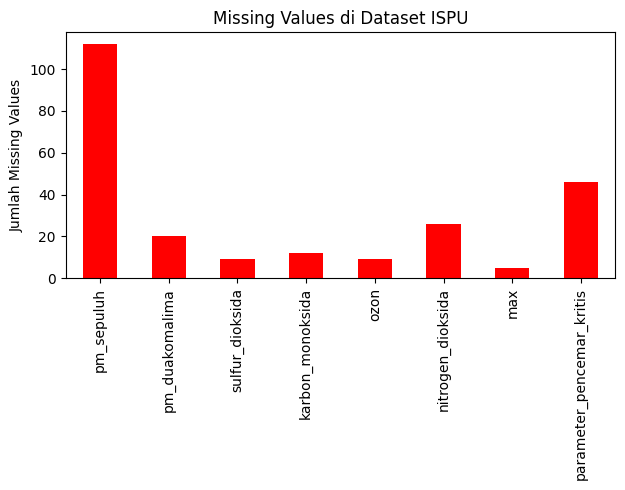

In [6]:
# Visualisasi Missing Values dengan Bar Chart
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
missing_values_ispu[missing_values_ispu > 0].plot(kind="bar", color="red")
plt.title("Missing Values di Dataset ISPU")
plt.ylabel("Jumlah Missing Values")

plt.tight_layout()
plt.show()


In [7]:
# Mengimpor pustaka yang diperlukan
import pandas as pd
from sklearn.impute import KNNImputer

# Menangani missing value untuk kolom numerik menggunakan KNN Imputer
numerical_columns = ['pm_sepuluh', 'pm_duakomalima', 'sulfur_dioksida', 'karbon_monoksida', 'ozon', 'nitrogen_dioksida', 'max']
imputer = KNNImputer(n_neighbors=5)
df_ispu[numerical_columns] = imputer.fit_transform(df_ispu[numerical_columns])

# Menangani missing value untuk kolom kategorikal menggunakan mode
df_ispu['parameter_pencemar_kritis'] = df_ispu['parameter_pencemar_kritis'].fillna(df_ispu['parameter_pencemar_kritis'].mode()[0])

# Menampilkan hasil setelah imputasi
print("✅ Missing value telah ditangani!")
print(df_ispu.isnull().sum())

✅ Missing value telah ditangani!
periode_data                 0
bulan                        0
tanggal                      0
stasiun                      0
pm_sepuluh                   0
pm_duakomalima               0
sulfur_dioksida              0
karbon_monoksida             0
ozon                         0
nitrogen_dioksida            0
max                          0
parameter_pencemar_kritis    0
kategori                     0
dtype: int64


In [8]:
# Menampilkan jumlah data sebelum dan sesudah proses cleaning
print(f"Jumlah data sebelum cleaning: {len(df_ispu)}")

# Menampilkan jumlah data setelah proses cleaning
print(f"Jumlah data setelah cleaning: {len(df_ispu.dropna())}")

# Menampilkan data setelah proses cleaning
print("✅ Data setelah proses cleaning:")
print(df_ispu.head())

Jumlah data sebelum cleaning: 1830
Jumlah data setelah cleaning: 1830
✅ Data setelah proses cleaning:
   periode_data  bulan  tanggal         stasiun  pm_sepuluh  pm_duakomalima  \
0        202401      1       21  DKI3 Jagakarsa        51.0            65.0   
1        202401      1       22  DKI3 Jagakarsa        27.0            34.0   
2        202401      1       23  DKI3 Jagakarsa        34.8            52.0   
3        202401      1       24  DKI3 Jagakarsa        46.0            65.0   
4        202401      1       25  DKI3 Jagakarsa        37.0            55.0   

   sulfur_dioksida  karbon_monoksida  ozon  nitrogen_dioksida   max  \
0             45.0               9.0   8.0               79.0  79.0   
1             45.0               5.0   8.0               56.0  56.0   
2             46.0               6.0   9.0               51.0  52.0   
3             46.0               8.0   9.0               38.0  65.0   
4             47.0               7.0  11.0               28.0  55.0 

In [9]:
# Menampilkan jumlah data sebelum dan sesudah proses cleaning dalam tabel
data_summary = {
    "Keterangan": ["Jumlah Data Sebelum Cleaning", "Jumlah Data Setelah Cleaning"],
    "Jumlah Data": [len(df_ispu), len(df_ispu.dropna())]
}

df_summary = pd.DataFrame(data_summary)

# Menampilkan tabel
print("📊 Ringkasan Jumlah Data Sebelum dan Sesudah Cleaning:")
print(df_summary)

📊 Ringkasan Jumlah Data Sebelum dan Sesudah Cleaning:
                     Keterangan  Jumlah Data
0  Jumlah Data Sebelum Cleaning         1830
1  Jumlah Data Setelah Cleaning         1830


In [10]:
# Cek jumlah data duplikat pada dataset ISPU
duplicates_ispu = df_ispu.duplicated().sum()
print(f"📌 Jumlah data duplikat pada dataset ISPU: {duplicates_ispu}")

# Cek jumlah data duplikat pada dataset Population
duplicates_population = df_population.duplicated().sum()
print(f"📌 Jumlah data duplikat pada dataset Population: {duplicates_population}")


📌 Jumlah data duplikat pada dataset ISPU: 0
📌 Jumlah data duplikat pada dataset Population: 0


 Identifikasi Data Tidak Konsisten


📌 Cek Data Duplikat:
✅ ISPU: 0 duplikat
✅ Population: 0 duplikat

📌 Nilai Anomali (Negatif) pada ISPU:
✅ Tidak ditemukan nilai negatif.

📌 Nilai Anomali (Negatif) pada Population:
✅ Tidak ditemukan nilai negatif.


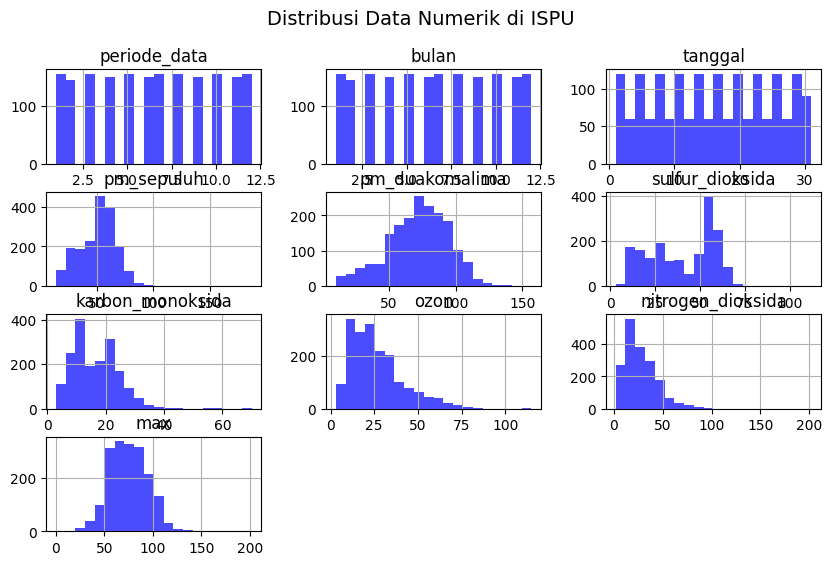

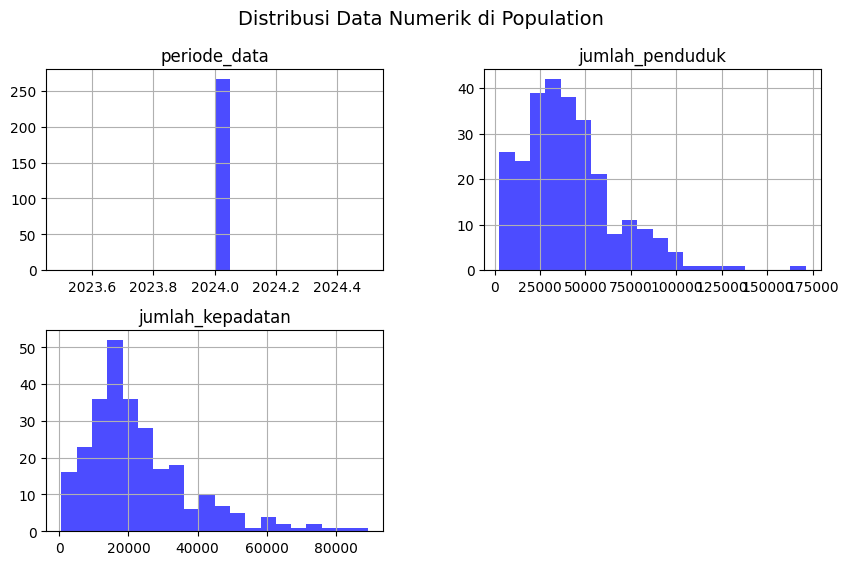

C:\Users\USER\AppData\Local\Temp\ipykernel_16716\3560090120.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette="viridis")


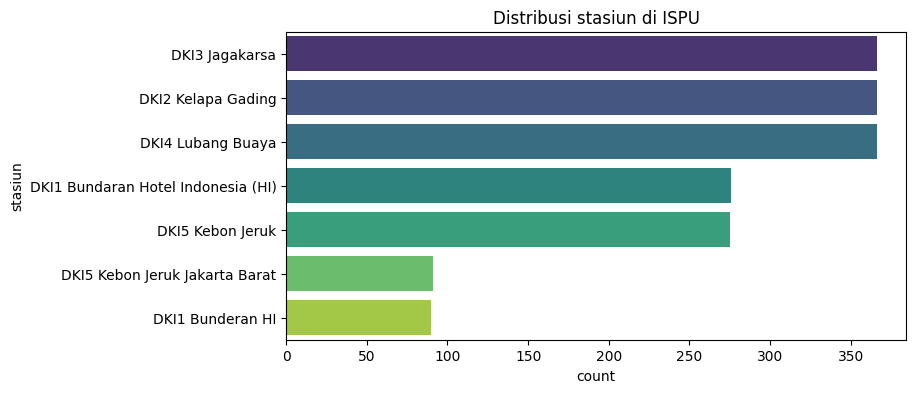

C:\Users\USER\AppData\Local\Temp\ipykernel_16716\3560090120.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette="viridis")


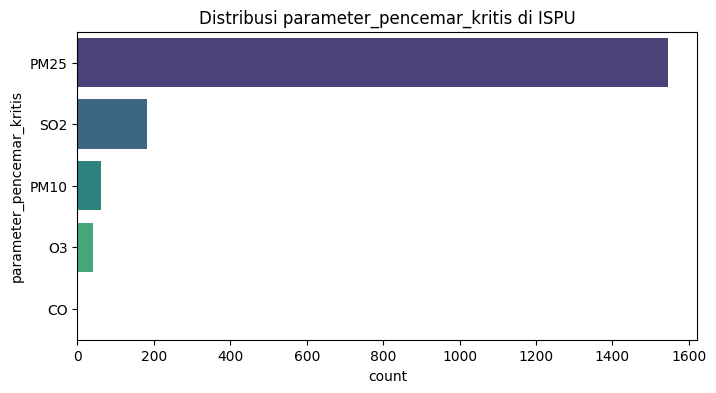

C:\Users\USER\AppData\Local\Temp\ipykernel_16716\3560090120.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette="viridis")


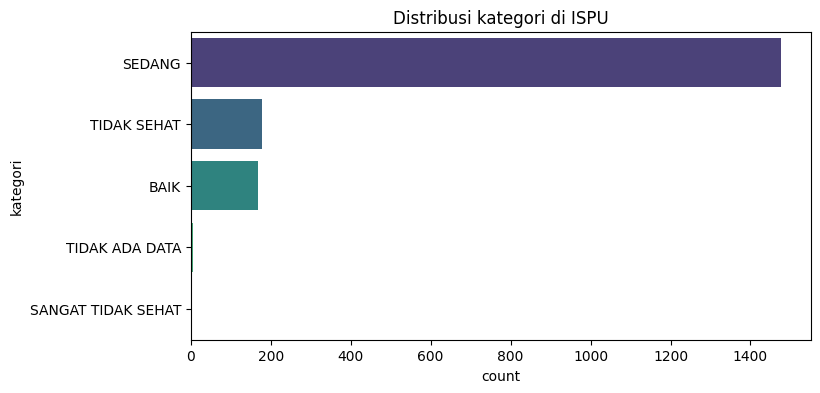

C:\Users\USER\AppData\Local\Temp\ipykernel_16716\3560090120.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette="viridis")


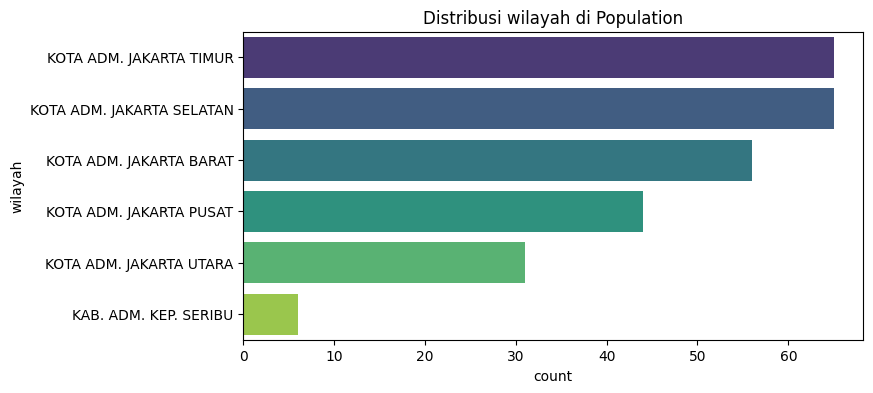

C:\Users\USER\AppData\Local\Temp\ipykernel_16716\3560090120.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette="viridis")


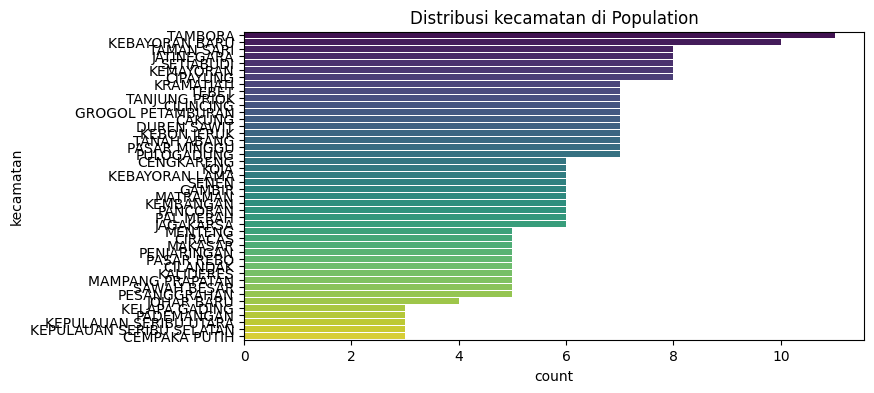

C:\Users\USER\AppData\Local\Temp\ipykernel_16716\3560090120.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette="viridis")


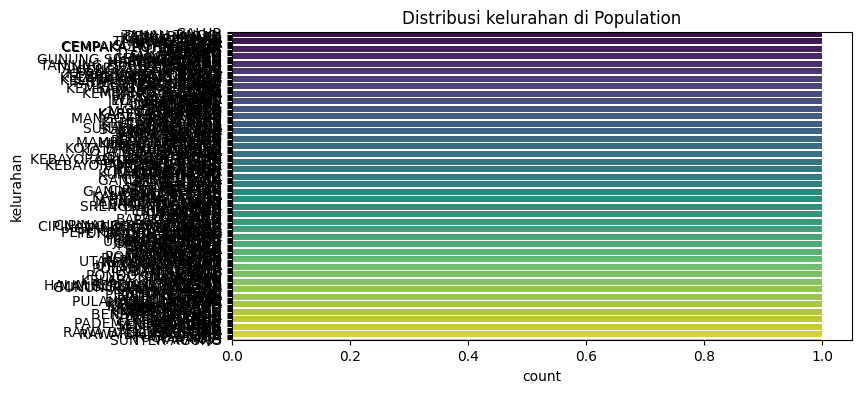

In [11]:
# 1️⃣ Cek Data Duplikat
duplicates_ispu = df_ispu.duplicated().sum()
duplicates_population = df_population.duplicated().sum()

print("\n📌 Cek Data Duplikat:")
print(f"✅ ISPU: {duplicates_ispu} duplikat")
print(f"✅ Population: {duplicates_population} duplikat")


# 2️⃣ Cek Nilai Anomali (Negatif)
def cek_nilai_anomali(df, nama_dataset):
    numeric_columns = df.select_dtypes(include=['number']).columns
    outliers = df[numeric_columns].lt(0).sum()
    outliers = outliers[outliers > 0]  # Hanya tampilkan yang memiliki nilai negatif

    print(f"\n📌 Nilai Anomali (Negatif) pada {nama_dataset}:")
    if outliers.empty:
        print("✅ Tidak ditemukan nilai negatif.")
    else:
        print(outliers.to_string())

# Panggil fungsi untuk setiap dataset
cek_nilai_anomali(df_ispu, "ISPU")
cek_nilai_anomali(df_population, "Population")


# 3️⃣ Visualisasi Distribusi Data Numerik
def visualisasi_distribusi(df, nama_dataset):
    numeric_columns = df.select_dtypes(include=['number']).columns
    df[numeric_columns].hist(figsize=(10, 6), bins=20, color='blue', alpha=0.7)
    plt.suptitle(f"Distribusi Data Numerik di {nama_dataset}", fontsize=14)
    plt.show()

# Panggil fungsi
visualisasi_distribusi(df_ispu, "ISPU")
visualisasi_distribusi(df_population, "Population")


# 4️⃣ Visualisasi Distribusi Data Kategorikal
def visualisasi_kategorikal(df, nama_dataset):
    categorical_columns = df.select_dtypes(include=['object']).columns
    for col in categorical_columns:
        plt.figure(figsize=(8, 4))
        sns.countplot(y=df[col], order=df[col].value_counts().index, palette="viridis")
        plt.title(f"Distribusi {col} di {nama_dataset}")
        plt.show()

# Panggil fungsi
visualisasi_kategorikal(df_ispu, "ISPU")
visualisasi_kategorikal(df_population, "Population")


In [12]:
df_ispu.head()

,periode_data,bulan,tanggal,stasiun,pm_sepuluh,pm_duakomalima,sulfur_dioksida,karbon_monoksida,ozon,nitrogen_dioksida,max,parameter_pencemar_kritis,kategori
0,202401,1,21,DKI3 Jagakarsa,51.0,65.0,45.0,9.0,8.0,79.0,79.0,PM25,SEDANG
1,202401,1,22,DKI3 Jagakarsa,27.0,34.0,45.0,5.0,8.0,56.0,56.0,PM25,SEDANG
2,202401,1,23,DKI3 Jagakarsa,34.8,52.0,46.0,6.0,9.0,51.0,52.0,PM25,SEDANG
3,202401,1,24,DKI3 Jagakarsa,46.0,65.0,46.0,8.0,9.0,38.0,65.0,PM25,SEDANG
4,202401,1,25,DKI3 Jagakarsa,37.0,55.0,47.0,7.0,11.0,28.0,55.0,PM25,SEDANG


In [13]:
# Ubah semua nilai 'periode_data' di dataset ISPU menjadi 2024
df_ispu['periode_data'] = 2024

# Cek apakah perubahan berhasil
df_ispu[['periode_data']].drop_duplicates()

,periode_data
0,2024


In [14]:
df_ispu.head()

,periode_data,bulan,tanggal,stasiun,pm_sepuluh,pm_duakomalima,sulfur_dioksida,karbon_monoksida,ozon,nitrogen_dioksida,max,parameter_pencemar_kritis,kategori
0,2024,1,21,DKI3 Jagakarsa,51.0,65.0,45.0,9.0,8.0,79.0,79.0,PM25,SEDANG
1,2024,1,22,DKI3 Jagakarsa,27.0,34.0,45.0,5.0,8.0,56.0,56.0,PM25,SEDANG
2,2024,1,23,DKI3 Jagakarsa,34.8,52.0,46.0,6.0,9.0,51.0,52.0,PM25,SEDANG
3,2024,1,24,DKI3 Jagakarsa,46.0,65.0,46.0,8.0,9.0,38.0,65.0,PM25,SEDANG
4,2024,1,25,DKI3 Jagakarsa,37.0,55.0,47.0,7.0,11.0,28.0,55.0,PM25,SEDANG


Koreksi Data Tidak Konsisten

Data Integrasion / Integrasi Data

In [15]:
# Memberi nama kolom yang sesuai
df_population .columns = ["periode_data", "wilayah", "kecamatan", "kelurahan", "jumlah_penduduk", "jumlah_kepadatan"]

# Konversi jumlah_penduduk dan jumlah_kepadatan ke tipe numerik
df_population ["jumlah_penduduk"] = pd.to_numeric(df_population ["jumlah_penduduk"], errors="coerce")
df_population ["jumlah_kepadatan"] = pd.to_numeric(df_population ["jumlah_kepadatan"], errors="coerce")

# Mapping stasiun ISPU ke wilayah
station_to_wilayah = {
    "DKI1 Bunderan HI": "KOTA ADM. JAKARTA PUSAT",
    "DKI1 Bundaran Hotel Indonesia (HI)": "KOTA ADM. JAKARTA PUSAT",
    "DKI2 Kelapa Gading": "KOTA ADM. JAKARTA UTARA",
    "DKI3 Jagakarsa": "KOTA ADM. JAKARTA SELATAN",
    "DKI4 Lubang Buaya": "KOTA ADM. JAKARTA TIMUR",
    "DKI5 Kebon Jeruk": "KOTA ADM. JAKARTA BARAT",
    "DKI5 Kebon Jeruk Jakarta Barat": "KOTA ADM. JAKARTA BARAT"
}

# Menambahkan kolom wilayah ke df_ispu
df_ispu["wilayah"] = df_ispu["stasiun"].map(station_to_wilayah)

# Melakukan merge dengan dataset kepadatan penduduk berdasarkan wilayah
df_merged = pd.merge(df_ispu, df_population , on="wilayah", how="left")

# Menampilkan hasil merge
df_merged.head()


,periode_data_x,bulan,tanggal,stasiun,pm_sepuluh,pm_duakomalima,sulfur_dioksida,karbon_monoksida,ozon,nitrogen_dioksida,max,parameter_pencemar_kritis,kategori,wilayah,periode_data_y,kecamatan,kelurahan,jumlah_penduduk,jumlah_kepadatan
0,2024,1,21,DKI3 Jagakarsa,51.0,65.0,45.0,9.0,8.0,79.0,79.0,PM25,SEDANG,KOTA ADM. JAKARTA SELATAN,2024,TEBET,TEBET TIMUR,20855,15840.82
1,2024,1,21,DKI3 Jagakarsa,51.0,65.0,45.0,9.0,8.0,79.0,79.0,PM25,SEDANG,KOTA ADM. JAKARTA SELATAN,2024,TEBET,TEBET BARAT,24533,14940.42
2,2024,1,21,DKI3 Jagakarsa,51.0,65.0,45.0,9.0,8.0,79.0,79.0,PM25,SEDANG,KOTA ADM. JAKARTA SELATAN,2024,TEBET,MENTENG DALAM,42737,17640.39
3,2024,1,21,DKI3 Jagakarsa,51.0,65.0,45.0,9.0,8.0,79.0,79.0,PM25,SEDANG,KOTA ADM. JAKARTA SELATAN,2024,TEBET,KEBON BARU,41690,32800.69
4,2024,1,21,DKI3 Jagakarsa,51.0,65.0,45.0,9.0,8.0,79.0,79.0,PM25,SEDANG,KOTA ADM. JAKARTA SELATAN,2024,TEBET,BUKIT DURI,40340,37612.79


In [16]:
# Agregasi data kepadatan penduduk per wilayah
df_population_agg = df_population.groupby("wilayah")[["jumlah_penduduk", "jumlah_kepadatan"]].sum().reset_index()

# Melakukan merge ulang dengan data ISPU berdasarkan wilayah
df_merged_fixed = pd.merge(df_ispu, df_population_agg, on="wilayah", how="left")

# Cek jumlah baris setelah perbaikan
df_merged_fixed.shape


(1830, 16)

In [17]:
df_merged_fixed.head()

,periode_data,bulan,tanggal,stasiun,pm_sepuluh,pm_duakomalima,sulfur_dioksida,karbon_monoksida,ozon,nitrogen_dioksida,max,parameter_pencemar_kritis,kategori,wilayah,jumlah_penduduk,jumlah_kepadatan
0,2024,1,21,DKI3 Jagakarsa,51.0,65.0,45.0,9.0,8.0,79.0,79.0,PM25,SEDANG,KOTA ADM. JAKARTA SELATAN,2331411,1150368.49
1,2024,1,22,DKI3 Jagakarsa,27.0,34.0,45.0,5.0,8.0,56.0,56.0,PM25,SEDANG,KOTA ADM. JAKARTA SELATAN,2331411,1150368.49
2,2024,1,23,DKI3 Jagakarsa,34.8,52.0,46.0,6.0,9.0,51.0,52.0,PM25,SEDANG,KOTA ADM. JAKARTA SELATAN,2331411,1150368.49
3,2024,1,24,DKI3 Jagakarsa,46.0,65.0,46.0,8.0,9.0,38.0,65.0,PM25,SEDANG,KOTA ADM. JAKARTA SELATAN,2331411,1150368.49
4,2024,1,25,DKI3 Jagakarsa,37.0,55.0,47.0,7.0,11.0,28.0,55.0,PM25,SEDANG,KOTA ADM. JAKARTA SELATAN,2331411,1150368.49


Menghapus class minoritas pada kolom parameter_pencemar_kritis (co) dan kategori (TIDAK ADA DATA,SANGAT TIDAK SEHAT)

In [18]:
# Hapus baris dengan kategori "co"
df_merged_fixed_filtered = df_merged_fixed[df_merged_fixed["parameter_pencemar_kritis"].str.lower() != "co"]

# Cek distribusi kelas setelah penghapusan
class_counts_after = Counter(df_merged_fixed_filtered["parameter_pencemar_kritis"])
print("Distribusi kelas setelah penghapusan kategori 'co':", class_counts_after)


# Hapus baris dengan kategori "TIDAK ADA DATA" dan "SANGAT TIDAK SEHAT"
df_merged_fixed_filtered = df_merged_fixed_filtered[
    ~df_merged_fixed_filtered["kategori"].str.upper().isin(["TIDAK ADA DATA", "SANGAT TIDAK SEHAT"])
]

# Cek distribusi kelas setelah penghapusan
class_counts_after = Counter(df_merged_fixed_filtered["kategori"])
print("Distribusi kelas setelah penghapusan kategori 'TIDAK ADA DATA' dan 'SANGAT TIDAK SEHAT':", class_counts_after)


Distribusi kelas setelah penghapusan kategori 'co': Counter({'PM25': 1545, 'SO2': 182, 'PM10': 61, 'O3': 41})
Distribusi kelas setelah penghapusan kategori 'TIDAK ADA DATA' dan 'SANGAT TIDAK SEHAT': Counter({'SEDANG': 1477, 'TIDAK SEHAT': 178, 'BAIK': 167})


Analisis tampilan data yang ingin di class imbalance

C:\Users\USER\AppData\Local\Temp\ipykernel_16716\4133450465.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_merged_fixed_filtered["kategori"], palette="viridis")


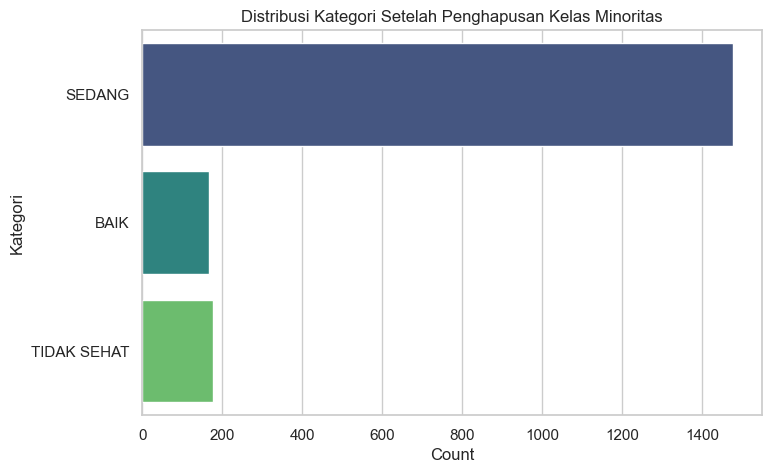

C:\Users\USER\AppData\Local\Temp\ipykernel_16716\4133450465.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df_merged_fixed_filtered["parameter_pencemar_kritis"], palette="mako")


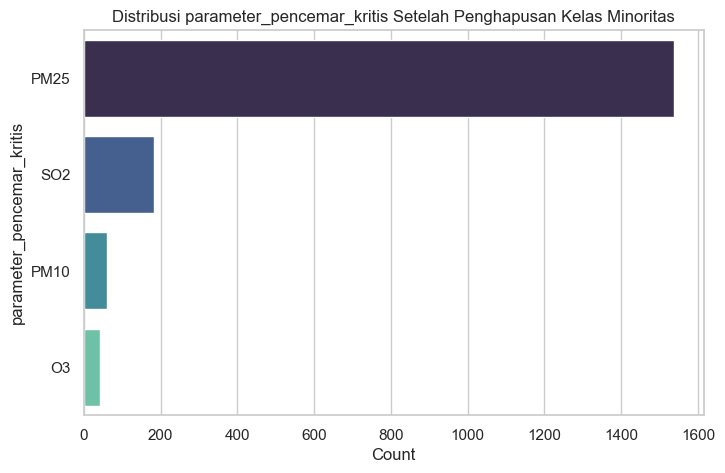

In [19]:
# Set seaborn style
sns.set(style="whitegrid")

# Plot distribusi kategori setelah penghapusan kelas minoritas
plt.figure(figsize=(8, 5))
sns.countplot(y=df_merged_fixed_filtered["kategori"], palette="viridis")
plt.title("Distribusi Kategori Setelah Penghapusan Kelas Minoritas")
plt.xlabel("Count")
plt.ylabel("Kategori")
plt.show()

# Plot distribusi parameter_pencemar_kritis setelah penghapusan kelas minoritas
plt.figure(figsize=(8, 5))
sns.countplot(y=df_merged_fixed_filtered["parameter_pencemar_kritis"], palette="mako")
plt.title("Distribusi parameter_pencemar_kritis Setelah Penghapusan Kelas Minoritas")
plt.xlabel("Count")
plt.ylabel("parameter_pencemar_kritis")
plt.show()

Random Oversampling

In [20]:
# Menampilkan informasi awal dataset
df_merged_fixed_filtered.info(), df_merged_fixed_filtered.head()

<class 'pandas.core.frame.DataFrame'>
Index: 1822 entries, 0 to 1829
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   periode_data               1822 non-null   int64  
 1   bulan                      1822 non-null   int64  
 2   tanggal                    1822 non-null   int64  
 3   stasiun                    1822 non-null   object 
 4   pm_sepuluh                 1822 non-null   float64
 5   pm_duakomalima             1822 non-null   float64
 6   sulfur_dioksida            1822 non-null   float64
 7   karbon_monoksida           1822 non-null   float64
 8   ozon                       1822 non-null   float64
 9   nitrogen_dioksida          1822 non-null   float64
 10  max                        1822 non-null   float64
 11  parameter_pencemar_kritis  1822 non-null   object 
 12  kategori                   1822 non-null   object 
 13  wilayah                    1822 non-null   object 
 1

(None,
    periode_data  bulan  tanggal         stasiun  pm_sepuluh  pm_duakomalima  \
 0          2024      1       21  DKI3 Jagakarsa        51.0            65.0   
 1          2024      1       22  DKI3 Jagakarsa        27.0            34.0   
 2          2024      1       23  DKI3 Jagakarsa        34.8            52.0   
 3          2024      1       24  DKI3 Jagakarsa        46.0            65.0   
 4          2024      1       25  DKI3 Jagakarsa        37.0            55.0   
 
    sulfur_dioksida  karbon_monoksida  ozon  nitrogen_dioksida   max  \
 0             45.0               9.0   8.0               79.0  79.0   
 1             45.0               5.0   8.0               56.0  56.0   
 2             46.0               6.0   9.0               51.0  52.0   
 3             46.0               8.0   9.0               38.0  65.0   
 4             47.0               7.0  11.0               28.0  55.0   
 
   parameter_pencemar_kritis kategori                    wilayah  \
 0       

In [21]:
# label_encoders = {}
# for col in ['stasiun', 'parameter_pencemar_kritis', 'kategori', 'wilayah']:
#     le = LabelEncoder()
#     df_merged_fixed_filtered[col] = le.fit_transform(df_merged_fixed_filtered[col])
#     label_encoders[col] = le  # Simpan encoder untuk digunakan kembali


In [22]:
df_merged_fixed_filtered.head()

,periode_data,bulan,tanggal,stasiun,pm_sepuluh,pm_duakomalima,sulfur_dioksida,karbon_monoksida,ozon,nitrogen_dioksida,max,parameter_pencemar_kritis,kategori,wilayah,jumlah_penduduk,jumlah_kepadatan
0,2024,1,21,DKI3 Jagakarsa,51.0,65.0,45.0,9.0,8.0,79.0,79.0,PM25,SEDANG,KOTA ADM. JAKARTA SELATAN,2331411,1150368.49
1,2024,1,22,DKI3 Jagakarsa,27.0,34.0,45.0,5.0,8.0,56.0,56.0,PM25,SEDANG,KOTA ADM. JAKARTA SELATAN,2331411,1150368.49
2,2024,1,23,DKI3 Jagakarsa,34.8,52.0,46.0,6.0,9.0,51.0,52.0,PM25,SEDANG,KOTA ADM. JAKARTA SELATAN,2331411,1150368.49
3,2024,1,24,DKI3 Jagakarsa,46.0,65.0,46.0,8.0,9.0,38.0,65.0,PM25,SEDANG,KOTA ADM. JAKARTA SELATAN,2331411,1150368.49
4,2024,1,25,DKI3 Jagakarsa,37.0,55.0,47.0,7.0,11.0,28.0,55.0,PM25,SEDANG,KOTA ADM. JAKARTA SELATAN,2331411,1150368.49


In [23]:
# from sklearn.utils import resample

# # Pastikan label encoding dilakukan untuk kategori yang perlu
# label_encoders = {}
# for col in ['parameter_pencemar_kritis', 'kategori']:
#     le = LabelEncoder()
#     df_merged_fixed_filtered[col] = le.fit_transform(df_merged_fixed_filtered[col])  # Gunakan fit_transform agar data tetap konsisten
#     label_encoders[col] = le

# # Fungsi untuk melakukan Random Oversampling manual
# def upsample_minority_class(df_merged_fixed_filtered, target_col):
#     max_size = df_merged_fixed_filtered[target_col].value_counts().max()  # Ambil jumlah terbesar dari kelas mayoritas
#     df_merged_fixed_filtered_upsampled = pd.DataFrame()  # DataFrame kosong untuk menyimpan hasil

#     # Lakukan Random Oversampling untuk setiap kelas dalam target_col
#     for class_label, group in df_merged_fixed_filtered.groupby(target_col):
#         df_merged_fixed_filtered_resampled = resample(group, replace=True, n_samples=max_size, random_state=42)
#         df_merged_fixed_filtered_upsampled = pd.concat([df_merged_fixed_filtered_upsampled, df_merged_fixed_filtered_resampled])

#     return df_merged_fixed_filtered_upsampled

# # Terapkan Random Oversampling ke 'parameter_pencemar_kritis'
# df_merged_fixed_filtered_resampled = upsample_minority_class(df_merged_fixed_filtered, 'parameter_pencemar_kritis')

# # Terapkan Random Oversampling ke 'kategori'
# df_merged_fixed_filtered_resampled = upsample_minority_class(df_merged_fixed_filtered_resampled, 'kategori')

# # Periksa distribusi kelas setelah Random Oversampling
# class_counts_after = df_merged_fixed_filtered_resampled[['parameter_pencemar_kritis', 'kategori']].value_counts()

# class_counts_after


In [24]:
from sklearn.utils import resample
import pandas as pd

# 1. Buat kolom kombinasi
df_merged_fixed_filtered['kombinasi'] = (
    df_merged_fixed_filtered['parameter_pencemar_kritis'].astype(str) + '_' +
    df_merged_fixed_filtered['kategori'].astype(str)
)

# 2. Tentukan ukuran maksimum (kelas mayoritas)
max_size = df_merged_fixed_filtered['kombinasi'].value_counts().max()

# 3. Oversampling berdasarkan kombinasi
df_resampled = pd.DataFrame()

for combo, group in df_merged_fixed_filtered.groupby('kombinasi'):
    upsampled = resample(group, replace=True, n_samples=max_size, random_state=42)
    df_resampled = pd.concat([df_resampled, upsampled])

# 4. Pecah kembali kolom kombinasi jadi dua kolom terpisah
df_resampled[['parameter_pencemar_kritis', 'kategori']] = df_resampled['kombinasi'].str.split('_', expand=True)

# Pastikan kolom 'parameter_pencemar_kritis' dan 'kategori' tetap dalam format string atau lakukan encoding jika diperlukan
# Jika encoding diperlukan, gunakan LabelEncoder seperti berikut:
if 'parameter_pencemar_kritis' in label_encoders:
    df_resampled['parameter_pencemar_kritis'] = label_encoders['parameter_pencemar_kritis'].transform(df_resampled['parameter_pencemar_kritis']) # type: ignore

if 'kategori' in label_encoders:
    df_resampled['kategori'] = label_encoders['kategori'].transform(df_resampled['kategori'])

# 5. Drop kolom 'kombinasi' jika tidak dibutuhkan
df_resampled.drop(columns='kombinasi', inplace=True)

# 6. Cek distribusi hasilnya
print(df_resampled.groupby(['parameter_pencemar_kritis', 'kategori']).size())


NameError: name 'label_encoders' is not defined

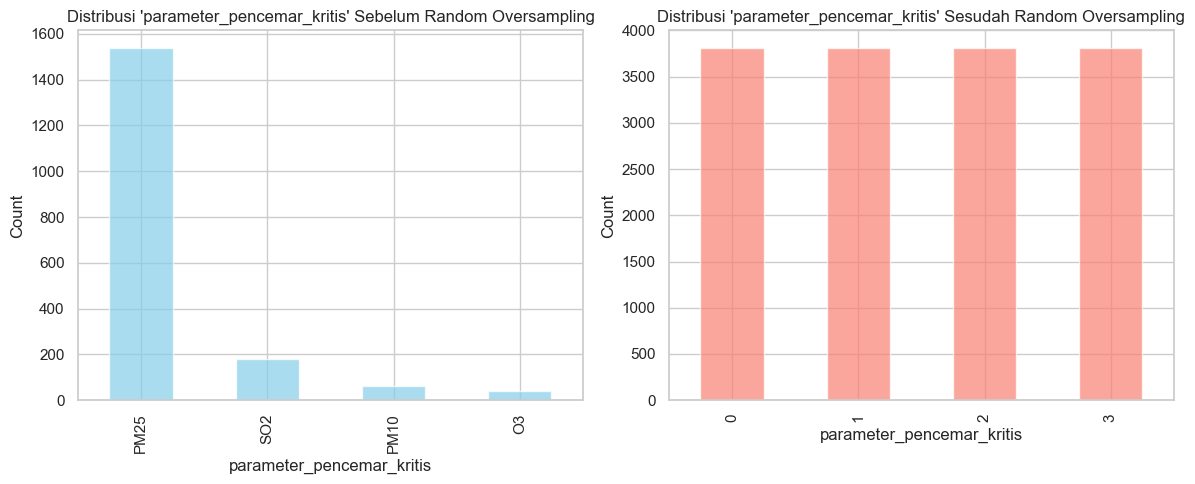

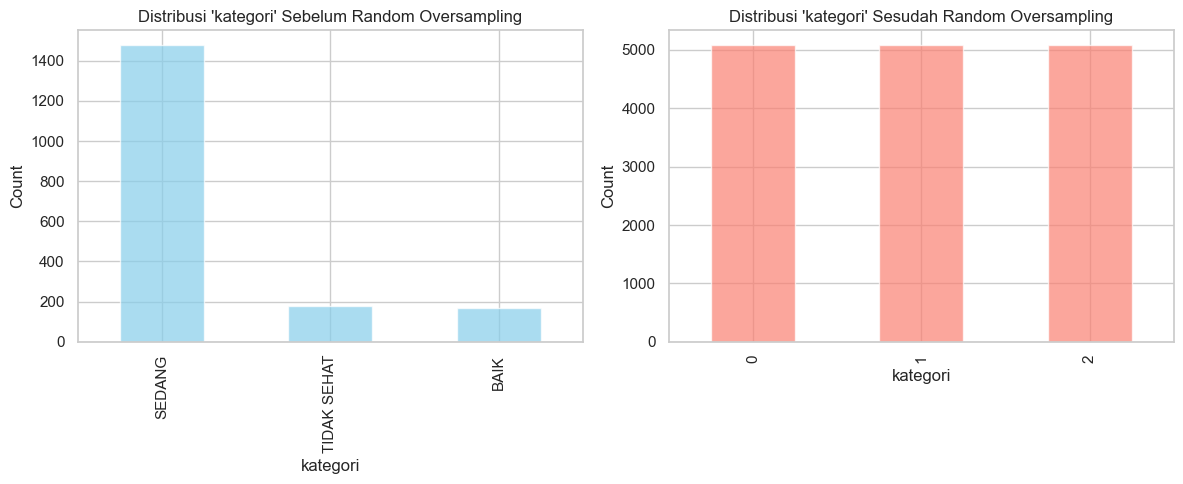

In [ ]:
import matplotlib.pyplot as plt

# Fungsi untuk menampilkan distribusi kelas sebelum dan sesudah Random Oversampling
def plot_class_distribution(df_before, df_after, column, title_before, title_after):
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Sebelum Random Oversampling
    df_before[column].value_counts().plot(kind='bar', ax=axes[0], color='skyblue', alpha=0.7)
    axes[0].set_title(title_before)
    axes[0].set_xlabel(column)
    axes[0].set_ylabel("Count")

    # Sesudah Random Oversampling
    df_after[column].value_counts().plot(kind='bar', ax=axes[1], color='salmon', alpha=0.7)
    axes[1].set_title(title_after)
    axes[1].set_xlabel(column)
    axes[1].set_ylabel("Count")

    plt.tight_layout()
    plt.show()

# Tampilkan distribusi kelas sebelum dan sesudah Random Oversampling untuk kedua kolom
plot_class_distribution(df_merged_fixed_filtered, df_resampled,
                        'parameter_pencemar_kritis',
                        "Distribusi 'parameter_pencemar_kritis' Sebelum Random Oversampling",
                        "Distribusi 'parameter_pencemar_kritis' Sesudah Random Oversampling")

plot_class_distribution(df_merged_fixed_filtered, df_resampled,
                        'kategori',
                        "Distribusi 'kategori' Sebelum Random Oversampling",
                        "Distribusi 'kategori' Sesudah Random Oversampling")


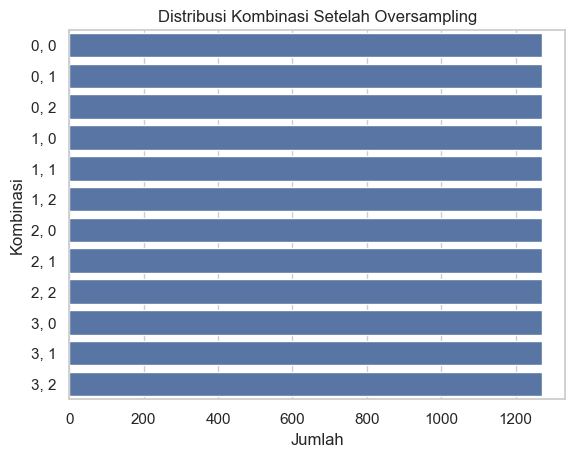

In [ ]:
df_resampled['kombinasi'] = df_resampled['parameter_pencemar_kritis'].astype(str) + ', ' + df_resampled['kategori'].astype(str)
sns.countplot(y='kombinasi', data=df_resampled, order=df_resampled['kombinasi'].value_counts().index)
plt.title("Distribusi Kombinasi Setelah Oversampling")
plt.xlabel("Jumlah")
plt.ylabel("Kombinasi")
plt.show()


In [ ]:
df_merged_fixed_filtered = df_merged_fixed_filtered.sort_values(
    by=['periode_data', 'bulan', 'tanggal'], ascending=[True, True, True]
).reset_index(drop=True)


In [25]:
df_resampled.reset_index(drop=True, inplace=True)

In [26]:
df_resampled.head()

,periode_data,bulan,tanggal,stasiun,pm_sepuluh,pm_duakomalima,sulfur_dioksida,karbon_monoksida,ozon,nitrogen_dioksida,max,parameter_pencemar_kritis,kategori,wilayah,jumlah_penduduk,jumlah_kepadatan,kombinasi
0,2024,3,8,DKI5 Kebon Jeruk,17.0,28.0,22.0,12.0,46.0,4.0,46.0,O3,BAIK,KOTA ADM. JAKARTA BARAT,2556752,1596903.42,O3_BAIK
1,2024,11,10,DKI5 Kebon Jeruk,29.6,49.2,38.0,23.0,49.0,17.0,49.0,O3,BAIK,KOTA ADM. JAKARTA BARAT,2556752,1596903.42,O3_BAIK
2,2024,3,18,DKI5 Kebon Jeruk,18.0,39.0,27.0,12.0,41.0,7.0,41.0,O3,BAIK,KOTA ADM. JAKARTA BARAT,2556752,1596903.42,O3_BAIK
3,2024,3,9,DKI5 Kebon Jeruk,27.0,41.0,25.0,14.0,45.0,10.0,45.0,O3,BAIK,KOTA ADM. JAKARTA BARAT,2556752,1596903.42,O3_BAIK
4,2024,3,8,DKI5 Kebon Jeruk,17.0,28.0,22.0,12.0,46.0,4.0,46.0,O3,BAIK,KOTA ADM. JAKARTA BARAT,2556752,1596903.42,O3_BAIK


In [ ]:
# Cek label encoding untuk parameter_pencemar_kritis dan kategori
label_encoders['parameter_pencemar_kritis'].inverse_transform([1])


array(['PM10'], dtype=object)

Label	Kolom	Arti (Contoh)
0	parameter_pencemar_kritis	O3
1	parameter_pencemar_kritis	PM10
2	parameter_pencemar_kritis	PM25
3	parameter_pencemar_kritis	SO2
0	kategori	Baik
1	kategori	Sedang
2	kategori	Buruk